## Assignement 1: Implementing Backpropagation

Ben Beissner I6336899 

### README

This notebook contains the implementation of the backpropagation of a neural network. First, the dataset is created and the network class with the neccessary functions is defined. After that several experiments with different parameters are performed and the results of the network training interpreted.

To run the experiments simply run all the cells of the notebook in order. Since random seeds are used whenever random initializaition occured, it can be expected that the results stay the same for multiple runs.

In [ ]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

np.random.seed(42)

## Data Generation

After installing the needed dependencies to create our network and initialize the weight matrix, we create our dataset. Therefore, we construct a numpy array consisting of the eight data samples. Then, we create a new array were we randomly sample 1000 instances of the eight samples and then initialize our target variable y with the same data as our instances X.

In [ ]:
np.random.seed(42)
# Initialize the input dataset
input_data = np.array([[0, 0, 0, 1, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 0, 1, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 1]])

# Create dataset consisting of 1000 samples
iter_list = [randint(0,7) for i in range(1000)]
X = []
for i in iter_list:
  X.append(input_data[i])
# Initialize the output dataset
#print(type(X[0]))
X = np.array(X)
print(X.shape)
y = X

(1000, 8)


## Definition of Network class and functions

We define a network as an object defined by a weight matrix, a list of the numbers of layers (in our case [8,3,8]) and a lerning rate alpha. When an object of the class network is initialized, the weight matrix according to the layer size is filled with randomized weights. This is done instead of using just 0 for all initial weights to prevent finding wrong local minima during learning which could lead to wrong predictions of the model.

### Functions
sigmoid:

This is the standard implementation of the sigmoid function
sigmoid_deriv:

This is the standard implementation of the sigmoid derivative

fit:

This function handles the actual training of the model. We attach the bias as an additional '1' at the end of our feature vector X so we can then treat it as an trainable parameter. After that we loop over our specified number of epochs/ iterations. In each epoch we train our network using each datapoint (fit_partial) and then calculate the loss.

fit_partial:

In this function the actual forward- and backward-pass takes place. During the forward pass we compute the input of the current layer by calculating the dot product of the activation and the weight matrix for the current layer. Each layers output is then computed by taking the net input and feeding it to our sigmoid function. The result is then attached to our list of activations.

To compute the backward pass (backpropagation) we start by computing our error which is the difference between the output prediction of a datapoint and its true label y. Then we initialise our list of deltas by taking the error and multiplying it by the derivative of the activation function of our output value. After that we can loop backwards through the layers and update the deltas. This is done by taking the delta value of the previous layer and compute the dot product with the weights of the current layer. Then multiply this value by passing the activation function of the current layer through our derivative of the activation function. This whole is the implementation of the chain rule for the derivatives. After computing the deltas we can update the weights for each layer. For each layer of the weight matrix we take the dot product of the current layer's activation and the according delta values and scale it by the learning rate alpha. This comlpetes the gradient descent which is the actual learning by the network.

predict:

The predict function calculates the output predictions for an instance by performing a forward pass through the network until we reach the final layer which will give us the predicted result in the same format as the input.

calculate_loss:

This is the implementation of our our loss function. We compute the sum of squared errors and scale it by 0.5.

In [ ]:
np.random.seed(42)
class NeuralNetwork:
  def __init__(self, layers, alpha=0.1):
    # initialize the list of weights matrices, then store the
    # network architecture and learning rate
    self.Weights = []
    self.layers = layers
    self.alpha = alpha
    # start looping from the index of the first layer but
    # stop before we reach the last two layers
    for i in np.arange(0, len(layers) - 2):
      # randomly initialize a weight matrix and adding extra node for bias term
      w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
      # scale w by dividing by the square root of the number of nodes in current layer for normalizing variance
      self.Weights.append(w / np.sqrt(layers[i]))
    # the last two layers are a special case where the input
    # connections need a bias term but the output does not
    w = np.random.randn(layers[-2] + 1, layers[-1])
    self.Weights.append(w / np.sqrt(layers[-2]))

  def sigmoid(self, x):
    return 1.0 / (1 + np.exp(-x))

  def sigmoid_deriv(self, x):
  # derivative of the sigmoid function
    return x * (1 - x)

  def fit(self, X, y, epochs=1000, displayUpdate=50):
    # insert a column of 1's as the last entry in the feature matrix
    X = np.c_[X, np.ones((X.shape[0]))]  # -> stack bias term at end of input feature array

    for epoch in np.arange(0, epochs):
      # loop over each individual data point and train our network on it
      for (x, target) in zip(X, y):
        self.fit_partial(x, target)
        loss = self.calculate_loss(X, y)
      # list 'losses' defined outside of function
      losses.append(loss)
      if epoch == 0 or (epoch + 1) % displayUpdate == 0:
        print("[INFO] epoch={}, loss={:.5f}".format(
        epoch + 1, loss))

  def fit_partial(self, x, y):
    # list of output activations for each layer
    # first activation is just the input feature vector itself
    Activations = [np.atleast_2d(x)]      # e.g A = [[0,0,0,0,0,1,0,0,1]]
    #print(A)

    # FEEDFORWARD:
    # loop over the layers in the network
    for layer in np.arange(0, len(self.Weights)):
      # taking the dot product between the activation and the weight matrix (current layer)
      net_input = Activations[layer].dot(self.Weights[layer])
      # output -> applying nonlinear activation function to input
      out = self.sigmoid(net_input)
      Activations.append(out)

    # BACKPROPAGATION
    # compute the difference between prediction and true target value
    error = Activations[-1] - y
    Deltas = [error * self.sigmoid_deriv(Activations[-1])]

    # implementation of chain rule with for loop
    # loop over the layers in reverse order
    for layer in np.arange(len(Activations) - 2, 0, -1):
      # delta of current layer = delta of previous layer dot weight matrix of current layer
      # then multiplying the delta by derivative of activation function for activation of current layer
      delta = Deltas[-1].dot(self.Weights[layer].T)
      delta = delta * self.sigmoid_deriv(Activations[layer])
      Deltas.append(delta)

    # reverse the deltas
    Deltas = Deltas[::-1]
    # WEIGHT UPDATE
    # loop over layers
    for layer in np.arange(0, len(self.Weights)):
      # update weights by taking dot product of layer activations with respective deltas
      # then multiplying value by learning rate and adding to weight matrix
      self.Weights[layer] += -self.alpha * Activations[layer].T.dot(Deltas[layer])

  def predict(self, X, addBias=True):
  # initialize the output prediction as input features -> forward pass through network to obtain prediction
    p = np.atleast_2d(X)
    # check to see if the bias column should be added
    if addBias:
      # insert a column of 1's as the last entry in the feature matrix (bias)
      p = np.c_[p, np.ones((p.shape[0]))]
    # loop over our layers in the network
    for layer in np.arange(0, len(self.Weights)):
    # output prediction = taking dot product of current activation value 'p'
    # and the weight matrix associated with current layer,
    # then passing this value through a nonlinear activation function
      p = self.sigmoid(np.dot(p, self.Weights[layer]))
    return p

  def calculate_loss(self, X, targets):
  # make predictions for the input data points then compute the loss
    targets = np.atleast_2d(targets)
    predictions = self.predict(X, addBias=False)
    loss = 0.5 * np.sum((predictions - targets) ** 2)
    # return the loss
    return loss

## Assesment of Accuracy

To further evaluate our network performance we introduce an accuracy measurement. This done by obtaining the indices of the highest values in the ground thruth label y and the predictions of our network. We then check for the whole dataset how many of these indices are correct which then gives us an accuracy measurement.

In [ ]:
# accuracy function
def accuracy_fn(y_true, y_pred):
  print(f'y: {y_true[0]}')
  print(f'Predictions: {y_pred[0]}')
  # check for how many intances the index of the '1' is correct
  indices1 = np.argmax(y_true, axis=1)
  indices2 = np.argmax(y_pred, axis=1)
  correct = np.sum(indices1 == indices2) #np.equal(y_true, y_pred).sum().item()
  print(f'Correct: {correct}')
  acc = (correct/len(y_pred)) * 100
  return acc

## Initialization of networks with different learning rate

To evaluate our functionality of the backpropagation and the overall learning abilities of our network we initialize four different network which differ in their learning rates. This gives us insights about the effects of different learning rates and let us estimate an optimal learning rate for our network. Further, we are asked to investigate the weights and activations of the hidden nodes of our network. To do this, we display the initial weights and compare them later to the final representation of the weights.


Note:

Since we are using a random seed the initial weights will always stay the same after rerunning the notebook.

In [ ]:
np.random.seed(42)
# try different learning rates
nn1 = NeuralNetwork([8, 3, 8], alpha=0.01)
print(f'Initial weights nn1:\n {nn1.Weights[1]}')
nn2 = NeuralNetwork([8, 3, 8], alpha=0.1)
print(f'Initial weights nn2 :\n {nn2.Weights[1]}')
nn3 = NeuralNetwork([8, 3, 8], alpha=0.3)
print(f'Initial weights nn3:\n {nn3.Weights[1]}')
nn4 = NeuralNetwork([8, 3, 8], alpha=0.5)
print(f'Initial weights nn4:\n {nn4.Weights[1]}')
networks = [nn1, nn2, nn3, nn4]

Initial weights nn1:
 [[ 0.12058745 -1.13141607 -0.76682857  0.11365789  0.42635388  0.09893952
  -0.06676957 -0.1738423 ]
 [-0.85362507 -0.41560225 -0.26594992  0.6103298   0.19838811 -1.01789171
   0.18710997 -0.22232736]
 [-0.3908211   0.35315147  0.59524785  0.53767483 -0.48452246 -0.17852385
   0.19125503  0.56323124]
 [-0.27665138 -0.10719026 -0.6387428  -0.69063022  0.469112    0.78302555
  -0.04157506  0.57938999]]
Initial weights nn2 :
 [[-0.09311835  0.23327887  1.08898994  0.10079255  0.14869679 -0.04298137
  -1.10780308 -0.01530779]
 [ 0.03477393  1.4221535  -0.11105965  0.17409844 -0.02004085 -0.67473658
   0.65980906  0.43412874]
 [ 0.45670251 -0.52503509  0.80990367 -0.80935909  0.3388221   1.26466015
  -0.57188641 -0.32695215]
 [ 0.05753374 -0.2906818  -0.89527595  0.03958485 -0.61332134  0.27342872
  -0.53082983  0.89485505]]
Initial weights nn3:
 [[-0.04451469  0.19696418  0.15974751  0.47757447  0.00750665  0.83919829
  -0.15279969  1.5704904 ]
 [ 0.36122921 -0.49488

## Network Training

In this part of the notebook the actual training of the model takes place. We initialized four networks with different learning rates (0.01, 0.1, 0.3, 0.5) which all be trained for 500 epochs/ iterations. After training we check the accuracy of the model, that is, computing for how many training instances the correct index of the '1' is predicted.

### Interpretation

In general, we can observe that for all teh models the loss decreases with ongoing epochs which let us assume that our network is learning the underlying representation of the data. For the model with learning rate 0.01 we see the latest convergence after approximately 500 epochs. We still see a perfect accuracy of 100% which can be explained because we have very little loss and just use training data in this assignment. Further, we have to note that the accuracy is calculated only on the position of the index with the highest value and not the original representation of the predictions which most likely improves the accuracy. For our second model (alpha=0.1) we see an earlier convergence after about 350 epochs. This is a result of the higher learning rate which leads to larger steps towards the direction of greatest improvement (gradient descent). The accuracy is again, as expected, at 100%. The third model (alpha=0.3) shows similar behaviour and converges already after about 100 epcohs. The last model with the highest learning rate (0.5) has the fastest convergences after only about 60 epochs which is reasonable regarding the highest learning rate.

Since we us seeds whenever we randomly initialise the parameters of the network it can be expected that the behaviour regarding convergence stays the same when repeating the experiments.

[INFO] epoch=1, loss=600.72914
[INFO] epoch=50, loss=254.24878
[INFO] epoch=100, loss=148.71029
[INFO] epoch=150, loss=93.00298
[INFO] epoch=200, loss=67.88420
[INFO] epoch=250, loss=54.31546
[INFO] epoch=300, loss=38.80043
[INFO] epoch=350, loss=25.63064
[INFO] epoch=400, loss=18.61395
[INFO] epoch=450, loss=14.70297
[INFO] epoch=500, loss=12.22235
y: [0 0 0 0 0 1 0 0]
Predictions: [0 0 0 0 0 1 0 0]
Correct: 1000
Accuracy of model 0.01: 100.0%


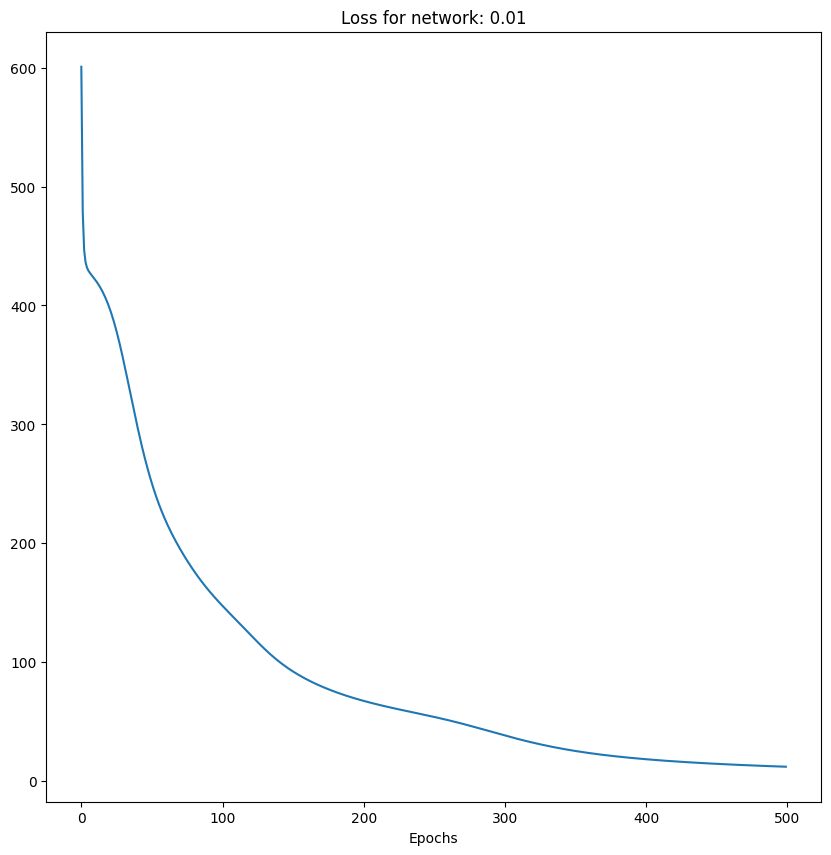

[INFO] epoch=1, loss=407.31790
[INFO] epoch=50, loss=49.99257
[INFO] epoch=100, loss=42.77399
[INFO] epoch=150, loss=39.87057
[INFO] epoch=200, loss=38.02406
[INFO] epoch=250, loss=36.62408
[INFO] epoch=300, loss=35.12926
[INFO] epoch=350, loss=2.29078
[INFO] epoch=400, loss=1.19373
[INFO] epoch=450, loss=0.85589
[INFO] epoch=500, loss=0.68420
y: [0 0 0 0 0 1 0 0]
Predictions: [0 0 0 0 0 1 0 0]
Correct: 1000
Accuracy of model 0.1: 100.0%


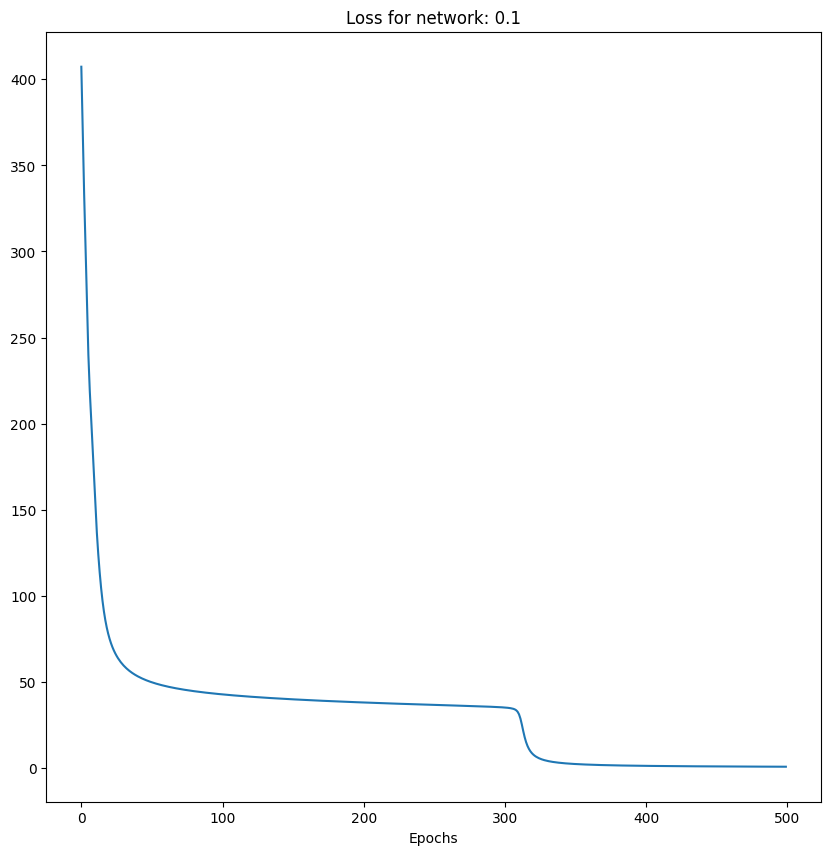

[INFO] epoch=1, loss=357.15561
[INFO] epoch=50, loss=37.88345
[INFO] epoch=100, loss=34.11929
[INFO] epoch=150, loss=32.25757
[INFO] epoch=200, loss=31.01936
[INFO] epoch=250, loss=30.10177
[INFO] epoch=300, loss=29.37983
[INFO] epoch=350, loss=28.78895
[INFO] epoch=400, loss=28.29132
[INFO] epoch=450, loss=27.86300
[INFO] epoch=500, loss=27.48792
y: [0 0 0 0 0 1 0 0]
Predictions: [0 0 0 0 0 1 0 0]
Correct: 1000
Accuracy of model 0.3: 100.0%


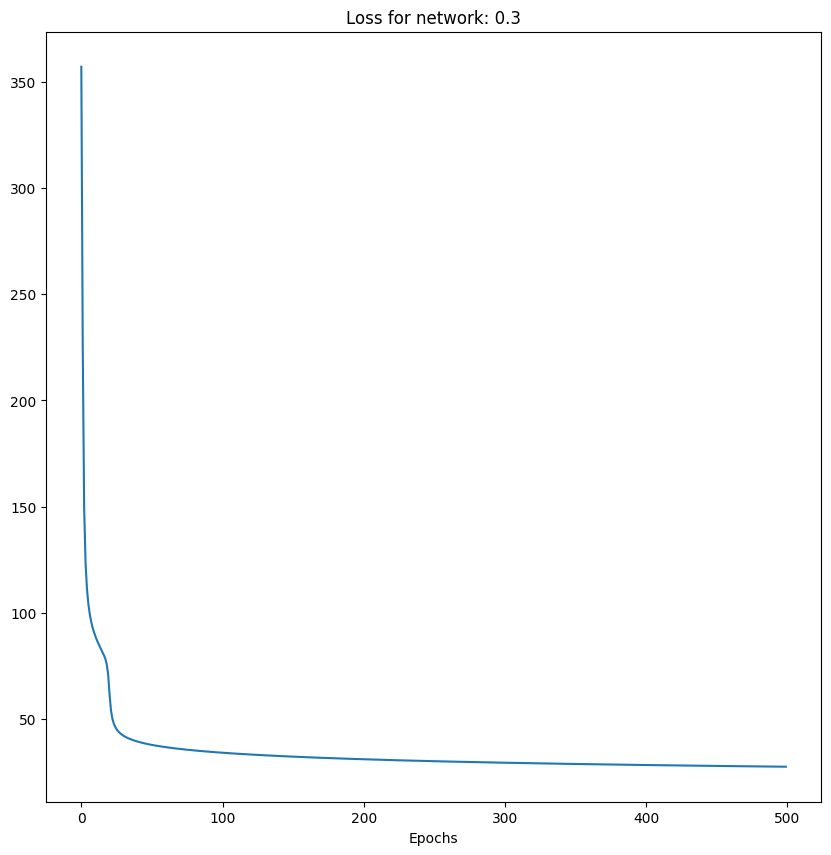

[INFO] epoch=1, loss=270.88003
[INFO] epoch=50, loss=3.32384
[INFO] epoch=100, loss=0.57201
[INFO] epoch=150, loss=0.35745
[INFO] epoch=200, loss=0.26388
[INFO] epoch=250, loss=0.20979
[INFO] epoch=300, loss=0.17427
[INFO] epoch=350, loss=0.14909
[INFO] epoch=400, loss=0.13029
[INFO] epoch=450, loss=0.11572
[INFO] epoch=500, loss=0.10409
y: [0 0 0 0 0 1 0 0]
Predictions: [0 0 0 0 0 1 0 0]
Correct: 1000
Accuracy of model 0.5: 100.0%


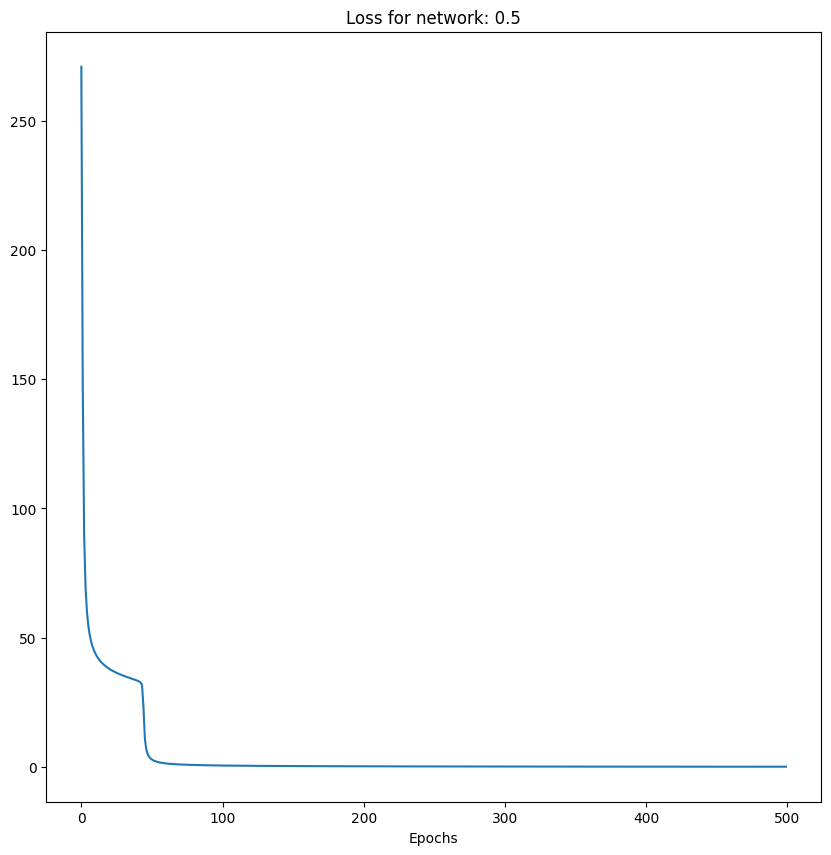

In [ ]:
np.random.seed(42)
for nn in networks:
  losses = []
  predictions = []
  accuracy_list = []
  nn.fit(X, y, epochs=500) # also different number of iteration possible
  # loop over dataset to make predictions
  for (x, target) in zip(X, y):
    # make a prediction on instance
    pred = nn.predict(x)
    # use argamx to see where '1' occurs
    max_index = np.argmax(pred)
    pred = np.zeros_like(pred)
    #print(pred[0][max_index])
    #print(type(pred))
    pred[0][max_index] = 1
    predictions.append(pred)
  predictions = np.array(predictions).reshape(1000,8).astype(int)
  accuracy = accuracy_fn(y, predictions)
  print(f'Accuracy of model {nn.alpha}: {accuracy}%')
    #print("[INFO] data={}, ground-truth={}, pred={}".format(
    #  x, target, pred[0]))

  #plot loss curve
  plt.figure(figsize=(10,10))
  plt.title(f"Loss for network: {nn.alpha}")
  plt.xlabel('Epochs')
  plt.plot(losses)
  plt.show()

## Interpretation of weights of hidden layer after training

In the following we can see the weights from the connections of the hidden layer to the output layer of the network. We observe that from each neuron of the hidden layer we have eight connections to the eight neurons of the output layer. Even though, we originially have 3 nodes in our hidden layer we see that we here have four representation of weights to the output layer. This is because we added the bias term to the input features which then leads to learned weights from the input layer. We can furthe see that the actual values of the weights differ from network to network what represents different states of the learning process.

In [ ]:
# Weights after training
print(f'Weights after training nn1:\n {nn1.Weights[1]}')
print(f'Weights after training nn2:\n {nn2.Weights[1]}')
print(f'Weights after training nn3:\n {nn3.Weights[1]}')
print(f'Weights after training nn4:\n {nn4.Weights[1]}')

Weights after training nn1:
 [[  2.11582235  -7.43282972  -5.6875429    4.57074547   1.74424536
    3.96316639  -6.28080679  -6.63747414]
 [ -9.62893567  -6.23996223   1.77446573  -1.47811247   2.98276878
   -6.58501135   4.29334413  -3.93033695]
 [  2.55896425   5.06121249   2.77977555  -1.65229313 -10.87747878
   -7.01622366  -4.97102099  -5.56938648]
 [ -3.16870346  -0.93685353  -8.34106704  -8.81785102  -3.58021788
    0.28644771  -1.56026364   5.40732722]]
Weights after training nn2:
 [[  6.0331029    5.68211644   8.41506836   0.75472137 -11.08393323
  -12.32573999 -11.98015997  -6.31954309]
 [-15.51410595   2.55865064  -2.83628935 -10.22418876  -1.12401557
  -11.00203867   7.99459081  -2.78267114]
 [ -7.51151289 -13.92529275  -1.8890393    5.31968392   6.71817295
    1.46333391  -9.80939922 -13.66274757]
 [  1.13205319  -7.43939811 -18.2324996   -6.37914524 -13.14527148
    5.26627633  -4.76289246   7.4153925 ]]
Weights after training nn3:
 [[-13.17498384  -9.37655269  -2.0272104